<a href="https://colab.research.google.com/github/ImenMasmoudiEm/ECOC-ALgorithm/blob/main/ECOC_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ECOC Algorithm

Data is here:

https://drive.google.com/file/d/1mTzaK5UwIl3sFSaWaXGpiUePKuWdAYzo/view?usp=sharing

More details about the problem here:

https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification/data

The code I used to Clean the Data:

https://colab.research.google.com/drive/1lpWdQK63KxGkSMasJaXQYhuN5biyowNL?usp=sharing

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df =pd.read_csv("/content/drive/MyDrive/All/Presentations/ML Academy/NLP/ECOC Algorithm/EcommerceDataset.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)

##ECOC Algorithm: Classification multi-classes
A-->1 , B-->0

First Decomposition: A=0+1 , B=2

Second Decomposition: A=0+2 , B=1

Third Decomposition: A=1+2 , B=0

###Tokenization

In [ ]:
#df['category'] = df['category'].map({'Household':0,'Books':1,'Electronics':2})
df.head()

,category,text
0,0,Paper Plane Design Framed Wall Hanging Motivat...
1,0,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,0,SAF 'UV Textured Modern Art Print Framed' Pain...
3,0,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,0,Incredible Gifts India Wooden Happy Birthday U...


In [ ]:
df.category.value_counts()

0    19313
1    11820
2    10621
Name: category, dtype: int64

In [ ]:
training_size=int(len(df['text'])*0.85)
Text = df['text']
Lables = df['category']

training_sentences = Text[0:training_size]
training_labels = Lables[0:training_size]
testing_sentences = Text[training_size:]
testing_labels = Lables[training_size:]

tokenizer = Tokenizer(num_words=3000, oov_token="oov")
tokenizer.fit_on_texts(training_sentences)

In [ ]:
word_index = tokenizer.word_index
word_index

{'oov': 1,
 'the': 2,
 'and': 3,
 'of': 4,
 'to': 5,
 'a': 6,
 'in': 7,
 'for': 8,
 'is': 9,
 'with': 10,
 'your': 11,
 'it': 12,
 'you': 13,
 'this': 14,
 'on': 15,
 'that': 16,
 'from': 17,
 'as': 18,
 'or': 19,
 'can': 20,
 'are': 21,
 'be': 22,
 'an': 23,
 'has': 24,
 '1': 25,
 'at': 26,
 'all': 27,
 'book': 28,
 'by': 29,
 '2': 30,
 'he': 31,
 'about': 32,
 'author': 33,
 'use': 34,
 '3': 35,
 'easy': 36,
 'home': 37,
 'set': 38,
 'one': 39,
 'will': 40,
 'his': 41,
 'have': 42,
 'not': 43,
 'also': 44,
 'x': 45,
 'which': 46,
 '5': 47,
 'quality': 48,
 'product': 49,
 'more': 50,
 'up': 51,
 'our': 52,
 'high': 53,
 'size': 54,
 'design': 55,
 'its': 56,
 'made': 57,
 'new': 58,
 '4': 59,
 'color': 60,
 'time': 61,
 'any': 62,
 'we': 63,
 'black': 64,
 'steel': 65,
 'power': 66,
 'other': 67,
 'was': 68,
 'water': 69,
 'best': 70,
 'most': 71,
 'used': 72,
 'comes': 73,
 'life': 74,
 'these': 75,
 '6': 76,
 'table': 77,
 'books': 78,
 'i': 79,
 'light': 80,
 'so': 81,
 'make': 82

In [ ]:
df1 = pd.DataFrame()
def count_words(input):
  return len(input.split())
max_length=count_words(max(training_sentences,key=count_words))
print(max_length)
df1['Word Count'] = [count_words(i) for i in training_sentences]
df1.describe()

8181


,Word Count
count,35490.000000
mean,119.950747
std,175.566254
min,1.000000
25%,35.000000
50%,83.000000
75%,159.000000
max,8181.000000


In [ ]:
max_length = 200

In [ ]:
training_sentences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sentences, maxlen=max_length, padding='post', truncating='post')

testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length, padding='post', truncating='post')

###Preparing the three Datasets

In [ ]:
training_labels1 = np.expand_dims(np.asarray(training_labels), axis=1).astype(np.int)
testing_labels1 = np.expand_dims(np.asarray(testing_labels), axis=1).astype(np.int)


for i in range(len(training_labels1)):
  if training_labels1[i]==0:
    training_labels1[i]=1
  elif training_labels1[i]==2:
    training_labels1[i]=0

for i in range(len(testing_labels1)):
  if testing_labels1[i]==0:
    testing_labels1[i]=1
  elif testing_labels1[i]==2:
    testing_labels1[i]=0

#**********

training_labels2 = np.expand_dims(np.asarray(training_labels), axis=1).astype(np.int)
testing_labels2 = np.expand_dims(np.asarray(testing_labels), axis=1).astype(np.int)



for i in range(len(training_labels2)):
  if training_labels2[i]==1:
    training_labels2[i]=0
  else:
    training_labels2[i]=1


for i in range(len(testing_labels2)):
  if testing_labels2[i]==1:
    testing_labels2[i]=0
  else:
    testing_labels2[i]=1

#**********

training_labels3 = np.expand_dims(np.asarray(training_labels), axis=1).astype(np.int)
testing_labels3 = np.expand_dims(np.asarray(testing_labels), axis=1).astype(np.int)


for i in range(len(training_labels3)):
  if training_labels3[i]==2:
    training_labels3[i]=1

for i in range(len(testing_labels3)):
  if testing_labels3[i]==2:
    testing_labels3[i]=1

<ipython-input-13-5db117880a3c>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  training_labels1 = np.expand_dims(np.asarray(training_labels), axis=1).astype(np.int)
<ipython-input-13-5db117880a3c>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

###Exploring the counts per new-class

In [ ]:
import pandas as pd

data1=[[i,j[0]] for i,j in zip(training_padded  , training_labels1)]
data2=[[i,j[0]] for i,j in zip(training_padded  , training_labels2)]
data3=[[i,j[0]] for i,j in zip(training_padded  , training_labels3)]

data1=pd.DataFrame(data1,columns=["sentences","classe"])
data2=pd.DataFrame(data2,columns=["sentences","classe"])
data3=pd.DataFrame(data3,columns=["sentences","classe"])

In [ ]:
data1.head()

,sentences,classe
0,"[240, 1, 55, 1, 112, 531, 1, 185, 284, 278, 20...",1
1,"[1, 1, 1, 1182, 211, 330, 114, 45, 101, 114, 3...",1
2,"[1, 1, 1, 263, 278, 473, 1, 1182, 1, 1731, 120...",1
3,"[1, 871, 473, 1, 1182, 1, 626, 47, 114, 45, 13...",1
4,"[1973, 1283, 121, 260, 1394, 2061, 217, 1, 293...",1


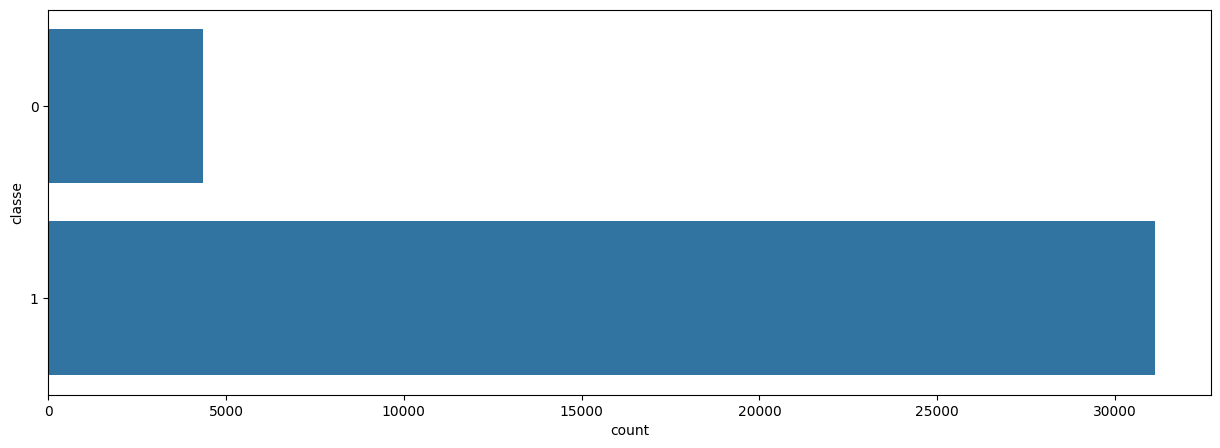

classe
0    4357
Name: classe, dtype: int64
classe
1    31133
Name: classe, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data1)
plt.show()
print(data1.loc[data1.classe==0].groupby('classe')["classe"].count())
print(data1.loc[data1.classe==1].groupby('classe')["classe"].count())

In [ ]:
#To Balence our data
S0=[]
L0=[]
S1=[]
L1=[]
for i in range(len(data1)):
  if data1['classe'][i]==1:
    S1.append(np.asarray(data1['sentences'][i]))
    L1.append(1)
  else:
    S0.append(np.asarray(data1['sentences'][i]))
    L0.append(0)
S1=S1[:5700]
L1=L1[:5700]

S=[]
L=[]
for i in range(max(len(S0),len(S1))):
  if i < len(S0):
    S.append(S0[i])
    L.append(0)
  S.append(S1[i])
  L.append(1)
S=np.asarray(S)
data1=[[i,j] for i,j in zip(S  , L)]
data1=pd.DataFrame(data1,columns=["sentences","classe"])
training_padded1=S

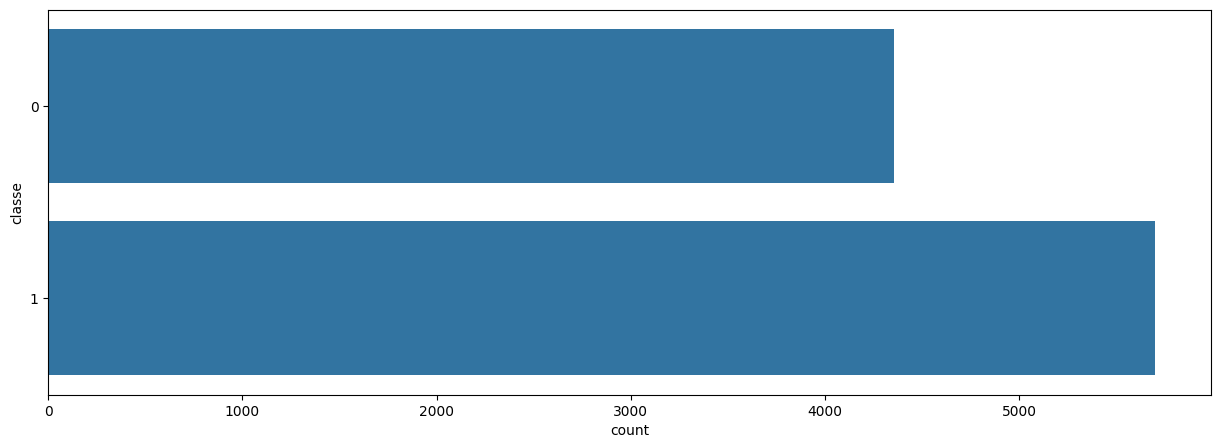

classe
0    4357
Name: classe, dtype: int64
classe
1    5700
Name: classe, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data1)
plt.show()
print(data1.loc[data1.classe==0].groupby('classe')["classe"].count())
print(data1.loc[data1.classe==1].groupby('classe')["classe"].count())

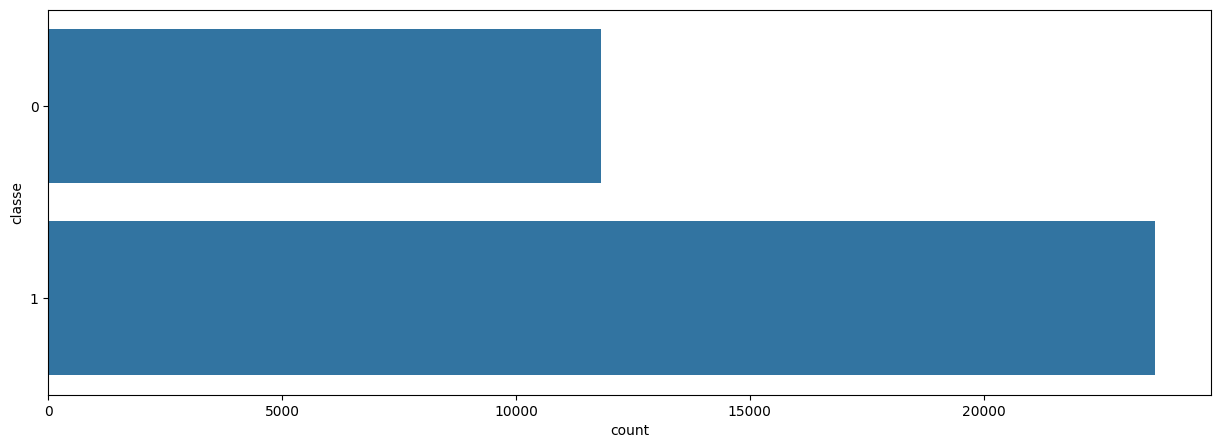

classe
0    11820
Name: classe, dtype: int64
classe
1    23670
Name: classe, dtype: int64


In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data2)
plt.show()
print(data2.loc[data2.classe==0].groupby('classe')["classe"].count())
print(data2.loc[data2.classe==1].groupby('classe')["classe"].count())

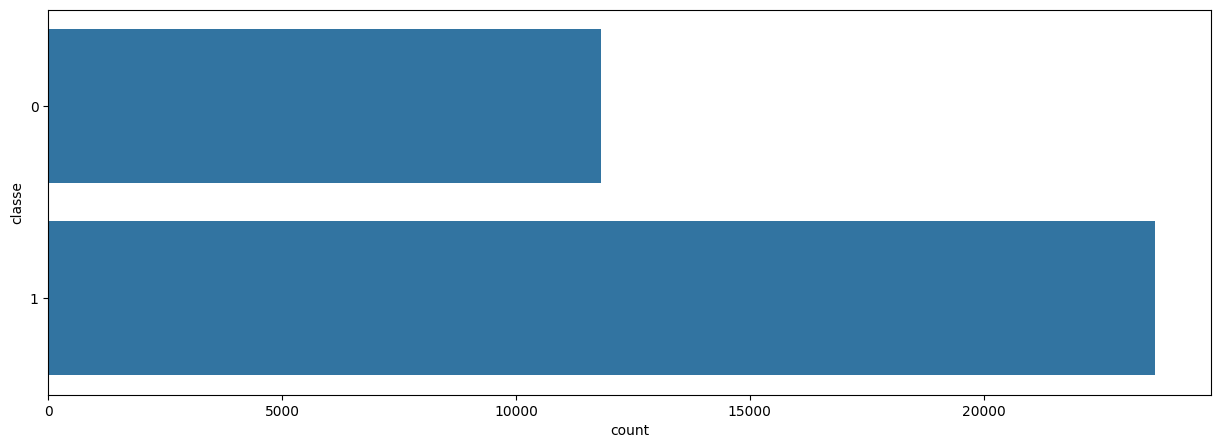

classe
0    11820
Name: classe, dtype: int64
classe
1    23670
Name: classe, dtype: int64


In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data2)
plt.show()
print(data2.loc[data2.classe==0].groupby('classe')["classe"].count())
print(data2.loc[data2.classe==1].groupby('classe')["classe"].count())

In [ ]:
training_labels1 = np.asarray(data1['classe']).astype('float32')
training_labels2 = np.asarray(data2['classe']).astype('float32')
training_labels3 = np.asarray(data3['classe']).astype('float32')

training_padded1 = np.asarray(data1['sentences'].to_list())
training_padded2 = np.asarray(data2['sentences'].to_list())
training_padded3 = np.asarray(data3['sentences'].to_list())

In [ ]:
training_padded1.shape

(10057, 200)

In [ ]:
embedding_dim = 16
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)

Running on TPU  ['10.115.186.2:8470']


In [ ]:
def create_model():
  model=tf.keras.models.Sequential ([
                                   tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                   tf.keras.layers.Conv1D(128, 5, activation='relu'),
                                   #tf.keras.layers.Conv1D(filters=32, kernel_size=1, activation='selu'),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,return_sequences=True)),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dropout(0.3),
                                   tf.keras.layers.Dense(units=24,activation='relu'),
                                   tf.keras.layers.Dense(units=1, activation='sigmoid')])
  model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
  return model

In [ ]:
with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  model1 = create_model()
  model2 = create_model()
  model3 = create_model()

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           1263792   
                                                                 
 conv1d (Conv1D)             (None, 196, 128)          10368     
                                                                 
 bidirectional (Bidirectiona  (None, 196, 64)          41216     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 196, 32)          10368     
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dropout (Dropout)           (None, 6272)              0

In [ ]:
history1 = model1.fit(training_padded1, training_labels1, batch_size=128, epochs=5, validation_data=(testing_padded, testing_labels1), verbose=1)

history2 = model2.fit(training_padded2, training_labels2, batch_size=128, epochs=5, validation_data=(testing_padded, testing_labels2), verbose=1)

history3 = model3.fit(training_padded3, training_labels3, batch_size=128, epochs=5, validation_data=(testing_padded, testing_labels3), verbose=1)

Epoch 1/5
79/79 [==============================] - 33s 221ms/step - loss: 0.2884 - accuracy: 0.8559 - val_loss: 0.4340 - val_accuracy: 0.8467
Epoch 2/5
79/79 [==============================] - 8s 99ms/step - loss: 0.0482 - accuracy: 0.9856 - val_loss: 0.4743 - val_accuracy: 0.8507
Epoch 3/5
79/79 [==============================] - 8s 102ms/step - loss: 0.0239 - accuracy: 0.9936 - val_loss: 0.6881 - val_accuracy: 0.8177
Epoch 4/5
79/79 [==============================] - 8s 99ms/step - loss: 0.0142 - accuracy: 0.9962 - val_loss: 0.6281 - val_accuracy: 0.8573
Epoch 5/5
79/79 [==============================] - 8s 99ms/step - loss: 0.0083 - accuracy: 0.9984 - val_loss: 0.5514 - val_accuracy: 0.8822
Epoch 1/5
278/278 [==============================] - 47s 116ms/step - loss: 0.1561 - accuracy: 0.9390 - val_loss: 0.1656 - val_accuracy: 0.9561
Epoch 2/5
278/278 [==============================] - 23s 83ms/step - loss: 0.0571 - accuracy: 0.9834 - val_loss: 0.2285 - val_accuracy: 0.9403
Epoch 3/5


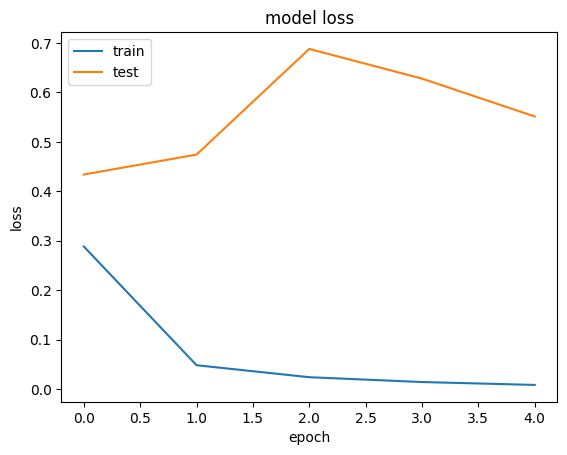

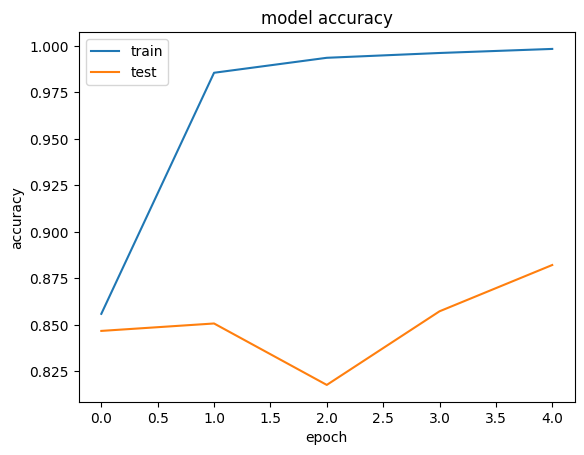

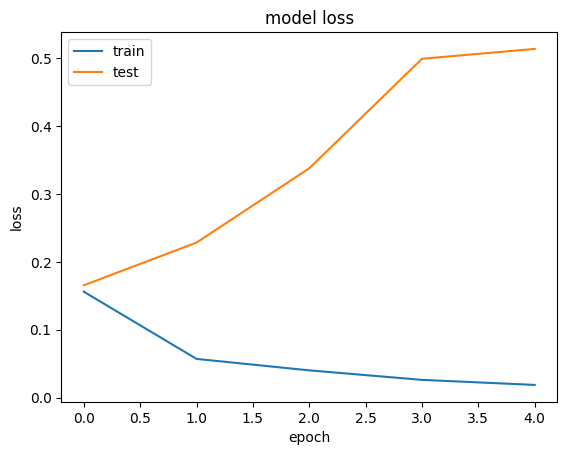

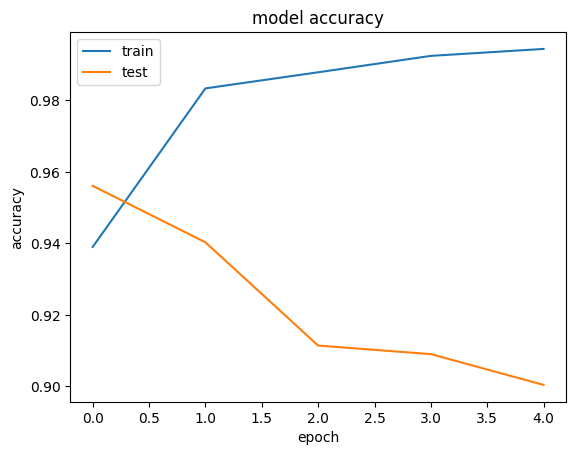

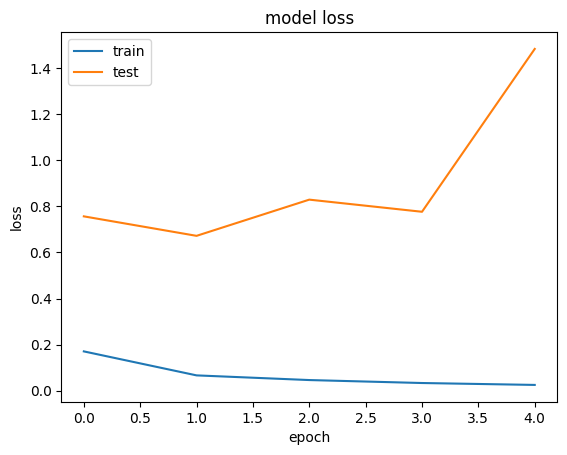

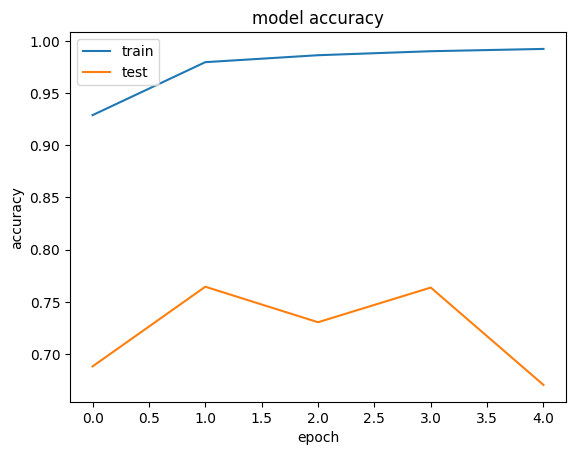

In [ ]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
L1=model1.predict(training_padded)
L2=model2.predict(training_padded)
L3=model3.predict(training_padded)

for i in range(len(L1)):
  L1[i]=0 if (L1[i]<0.5) else 1
  L2[i]=0 if (L2[i]<0.5) else 1
  L3[i]=0 if (L3[i]<0.5) else 1
P=[]
for i in range(len(L1)):
  P.append(str(int(L1[i][0]))+str(int(L2[i][0]))+str(int(L3[i][0])))

print(P[2])

1110/1110 [==============================] - 25s 20ms/step
110


In [ ]:
def hamming_distance(string1, string2):
	dist_counter = 0
	for n in range(len(string1)):
		if string1[n] != string2[n]:
			dist_counter += 1
	return dist_counter

pred=[]
for i in range(len(P)):
  if (min(min(hamming_distance(P[i],'110'),hamming_distance(P[i],'101')),hamming_distance(P[i],'011'))==hamming_distance(P[i],'101')):
    pred.append(1)
  elif (min(min(hamming_distance(P[i],'110'),hamming_distance(P[i],'101')),hamming_distance(P[i],'011'))==hamming_distance(P[i],'011')):
    pred.append(2)
  else:
    pred.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(training_labels, pred)
print("For the Ensemble methode: \n",cm)
print(classification_report(training_labels, pred, labels=[0,1,2]))

For the Ensemble methode: 
 [[16728    40  2545]
 [   30 11771    19]
 [    3    26  4328]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     19313
           1       0.99      1.00      1.00     11820
           2       0.63      0.99      0.77      4357

    accuracy                           0.92     35490
   macro avg       0.87      0.95      0.90     35490
weighted avg       0.95      0.92      0.93     35490



##Ressources:
* https://www.ibm.com/topics/bagging#:~:text=IBM-,What%20is%20bagging%3F,be%20chosen%20more%20than%20once.
